In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Merging Datasets

### Play Store

In [2]:
play_features = pd.read_csv("data/play_features_0317.csv")
play_features_new = pd.read_csv("data/play_features_0422.csv")
play_features_full = pd.concat([play_features_new[play_features.columns], play_features]).drop_duplicates(subset=['appId'])

# merging labeled apps
play_labeled = pd.read_csv("data/p01_apps_play_0202.csv")[['app_fullname', 'Educational', 'Violent', 'Manipulative_3plus', 'Manipulative_2plus']].dropna(subset=['app_fullname'])
play_labeled_new = pd.read_csv("data/p01_apps_play_0421.csv")[['app_fullname', 'Educational', 'Violent', 'Manipulative_3plus', 'Manipulative_2plus']].dropna(subset=['app_fullname'])
play_labeled_p01 = play_labeled_new.merge(play_labeled, on=['app_fullname', 'Educational', 'Violent', 'Manipulative_3plus', 'Manipulative_2plus'], how='outer')

In [3]:
play_features_full.head()

,reviews,offersIAP,ratings,containsAds,realInstalls,contentRating,adSupported,title,sale,score,...,ratingsStd,ratingsSkew,descriptionSentiment,reviewsSentiment,descriptionReadability,descriptionGrammar,developerNApps,developerAppAgeMedian,developerCountry,releasedYear
0,201,False,15651,True,11887057,Teen,True,Gossip Girls Divas Highschool,False,3.790000,...,1.6568,-0.8693,0.9975,0.1402,10.5,99.64,20,6.1,RO,2018.0
1,38,False,969,True,1313098,Teen,True,Injured Dolphin Care,False,4.287234,...,1.3722,-1.6661,0.9972,0.3987,10.9,99.52,20,6.1,RO,2016.0
2,0,False,0,False,1469,Everyone,False,Tongo Music - for kids,False,0.000000,...,NaN,NaN,0.9955,0.2498,9.2,99.95,2,4.4,DE,2016.0
3,830,True,12836,False,4756511,Everyone,False,CHOMP by Christoph Niemann,False,4.455555,...,1.1704,-2.0864,0.9988,0.7547,7.8,99.79,10,5.1,DE,2016.0
4,312627,True,6720849,True,541822129,Everyone,True,slither.io,False,3.953574,...,1.5299,-1.1132,0.8807,0.5517,4.2,99.77,1,7.1,US,2016.0


In [4]:
play_labeled_p01.head()

,app_fullname,Educational,Violent,Manipulative_3plus,Manipulative_2plus
0,air.com.bmapps.gossipgirlsdivasinhighschool,0.0,0.0,NaN,NaN
1,air.com.bmapps.injureddolphincare,0.0,0.0,NaN,NaN
2,air.com.CaringForPuppySalon,NaN,NaN,NaN,NaN
3,air.com.cloudkid.peep.hideandpeep,1.0,0.0,NaN,NaN
4,air.com.cloudkid.peep.paintsplat,1.0,0.0,NaN,NaN


In [5]:
play_labeled_p01['Educational'].value_counts()

0.0    313
1.0     93
Name: Educational, dtype: int64

In [6]:
play_full = play_labeled_p01.merge(play_features_full, left_on="app_fullname", right_on="appId", how="inner")

In [7]:
play_full.shape

(437, 29)

In [8]:
play_full['releasedYears'] = 2023 - play_full['releasedYear']

In [9]:
play_full.head()

,app_fullname,Educational,Violent,Manipulative_3plus,Manipulative_2plus,reviews,offersIAP,ratings,containsAds,realInstalls,...,ratingsSkew,descriptionSentiment,reviewsSentiment,descriptionReadability,descriptionGrammar,developerNApps,developerAppAgeMedian,developerCountry,releasedYear,releasedYears
0,air.com.bmapps.gossipgirlsdivasinhighschool,0.0,0.0,NaN,NaN,201,False,15651,True,11887057,...,-0.8693,0.9975,0.1402,10.5,99.64,20,6.1,RO,2018.0,5.0
1,air.com.bmapps.injureddolphincare,0.0,0.0,NaN,NaN,38,False,969,True,1313098,...,-1.6661,0.9972,0.3987,10.9,99.52,20,6.1,RO,2016.0,7.0
2,air.com.firstconcert.DMA,1.0,NaN,NaN,NaN,0,False,0,False,1469,...,NaN,0.9955,0.2498,9.2,99.95,2,4.4,DE,2016.0,7.0
3,air.com.foxandsheep.chomp,0.0,0.0,NaN,NaN,830,True,12836,False,4756511,...,-2.0864,0.9988,0.7547,7.8,99.79,10,5.1,DE,2016.0,7.0
4,air.com.hypah.io.slither,0.0,1.0,0.0,1.0,312627,True,6720849,True,541822129,...,-1.1132,0.8807,0.5517,4.2,99.77,1,7.1,US,2016.0,7.0


In [10]:
play_full.to_csv("data/p01_apps_play_merged_0422.csv", index=False)

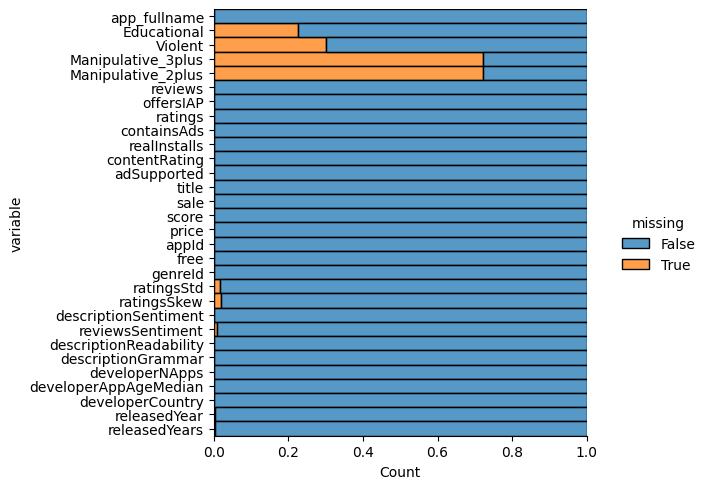

In [11]:
sns.displot(
    data=play_full.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

## Educational

### Preprocessing

In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, LearningCurveDisplay, cross_validate, train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [13]:
play_educational = play_full.dropna(subset=['ratingsStd', 'ratingsSkew', 'releasedYear', 'releasedYears', 'Educational']).drop(columns=['app_fullname', 'title', 'Violent', 'Manipulative_3plus', 'Manipulative_2plus', 'releasedYear'])

In [14]:
play_educational.shape

(329, 24)

In [169]:
X = play_educational.drop(columns=['Educational', 'appId', 'developerCountry'])
y = play_educational['Educational']

In [170]:
y.value_counts()

0.0    269
1.0     60
Name: Educational, dtype: int64

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
num_columns = ['realInstalls', 'price', 'ratings', 'reviews', 'score', 'ratingsStd', 'ratingsSkew', 'descriptionSentiment', 'reviewsSentiment', 'descriptionReadability', 'descriptionGrammar', 'developerNApps', 'developerAppAgeMedian', 'releasedYears']
cat_columns = ['genreId', 'contentRating'] # , 'developerCountry'
bool_columns = ['offersIAP', 'sale', 'containsAds', 'free', 'adSupported']

Standardizing numeric columns and dummifying categorical ones.

In [173]:
scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.fit_transform(X_test[num_columns])

In [174]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

Not all dummified columns are in both the training and testing set, hence the need to align the columns in the two dataframes.

In [175]:
X_train, X_test = X_train.align(X_test, axis=1, fill_value=0)

Oversampling using SMOTE to overcome imbalanced target variable.

In [22]:
sm = SMOTE(random_state=42)

In [23]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [24]:
X_train_res.head()

,adSupported,containsAds,contentRating_Everyone 10+,contentRating_Mature 17+,contentRating_Teen,descriptionGrammar,descriptionReadability,descriptionSentiment,developerAppAgeMedian,developerNApps,...,price,ratings,ratingsSkew,ratingsStd,realInstalls,releasedYears,reviews,reviewsSentiment,sale,score
0,True,True,0,0,0,-0.247201,-0.667530,0.215518,0.325715,-1.440921,...,-0.349692,0.746208,-1.129577,-1.273356,0.790549,-0.189270,0.432051,0.425525,False,1.070619
1,True,True,0,0,0,0.784298,-0.414717,0.231381,0.954666,0.205718,...,-0.349692,1.111925,-0.182943,-0.333814,0.617820,0.236184,1.003783,-0.869413,False,0.375492
2,False,False,0,0,0,0.165399,0.777114,0.211364,-0.345166,0.205718,...,-0.349692,-0.254936,1.787498,1.923744,-0.372279,-0.189270,-0.247010,-1.743432,False,-2.573707
3,True,True,0,0,0,-0.129316,-1.100923,0.230626,-0.345166,2.558060,...,-0.349692,-0.254042,0.043999,0.191191,-0.365967,-1.465632,-0.246626,0.685542,False,0.160494
4,True,True,0,0,0,0.224341,-1.100923,-0.042823,-0.219375,-1.911389,...,-0.349692,0.053320,1.344718,1.132631,0.518881,-1.040178,-0.027102,-1.133292,False,-1.704561


### Modeling

Evaluating features using logistic regression.

In [163]:
import statsmodels.api as sm

lr_exp = sm.GLM(y_train.values, X_train.astype(float), family=sm.families.Binomial()).fit()

/Users/dershan/opt/anaconda3/envs/dash/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [164]:
lr_exp.summary()

/Users/dershan/opt/anaconda3/envs/dash/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/Users/dershan/opt/anaconda3/envs/dash/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  263
Model:                            GLM   Df Residuals:                      225
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 22 Apr 2023   Deviance:                       5342.0
Time:                        14:46:30   Pearson chi2:                 2.61e+17
No. Iterations:                    22   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
adSupported                 -2.67e+14   6.08e+06  -4.39e+07      0.000   -2.67e+14   -2.67e+14
containsAds                 -2.67e+14   6.08e+06  -4.39e+07      0.000   -2.67e+14   -2.67e+14
contentRating_Everyone 10+  8.369e+14   2.35e+07   3.57e+07      0.000    8.37e+14    8.37e+14
contentRating_Mature 17+   -2.769e+15   7.97e+07  -3.48e+07      0.000   -2.77e+15   -2.77e+15
contentRating_Teen         -1.239e+15   1.97e+07  -6.29e+07      0.000   -1.24e+15   -1.24e+15
descriptionGrammar         -1.763e+14   4.69e+06  -3.76e+07      0.000   -1.76e+14   -1.76e+14
descriptionReadability      1.434e+14   4.99e+06   2.87e+07      0.000    1.43e+14    1.43e+14
descriptionSentiment        1.277e+14    4.8e+06   2.66e+07      0.000    1.28e+14    1.28e+14
developerAppAgeMedian       1.157e+14   5.85e+06   1.98e+07      0.000    1.16e+14    1.16e+14
developerNApps             -2.023e+14      5e+06  -4.05e+07      0.000   -2.02e+14   -2.02e+14
free                        -2.46e+15   4.24e+07  -5.81e+07      0.000   -2.46e+15   -2.46e+15
genreId_EDUCATION            2.44e+15   3.69e+07   6.62e+07      0.000    2.44e+15    2.44e+15
genreId_ENTERTAINMENT       8.772e+14   4.36e+07   2.01e+07      0.000    8.77e+14    8.77e+14
genreId_GAME_ACTION         1.135e+15   4.48e+07   2.53e+07      0.000    1.13e+15    1.13e+15
genreId_GAME_ADVENTURE      1.693e+15   4.27e+07   3.97e+07      0.000    1.69e+15    1.69e+15
genreId_GAME_ARCADE         3.914e+14   3.96e+07   9.88e+06      0.000    3.91e+14    3.91e+14
genreId_GAME_BOARD         -1.832e+15   7.98e+07   -2.3e+07      0.000   -1.83e+15   -1.83e+15
genreId_GAME_CARD          -1.648e+15   7.71e+07  -2.14e+07      0.000   -1.65e+15   -1.65e+15
genreId_GAME_CASUAL         1.294e+15   4.02e+07   3.22e+07      0.000    1.29e+15    1.29e+15
genreId_GAME_EDUCATIONAL    1.185e+15   3.88e+07   3.05e+07      0.000    1.18e+15    1.18e+15
genreId_GAME_MUSIC          1.437e+15   5.53e+07    2.6e+07      0.000    1.44e+15    1.44e+15
genreId_GAME_PUZZLE         2.283e+15   4.04e+07   5.66e+07      0.000    2.28e+15    2.28e+15
genreId_GAME_RACING         2.122e+15   4.27e+07   4.97e+07      0.000    2.12e+15    2.12e+15
genreId_GAME_ROLE_PLAYING  -1.173e+15   5.07e+07  -2.31e+07      0.000   -1.17e+15   -1.17e+15
genreId_GAME_SIMULATION     1.479e+15   4.35e+07    3.4e+07      0.000    1.48e+15    1.48e+15
genreId_GAME_SPORTS         6.012e+14   4.43e+07   1.36e+07      0.000    6.01e+14    6.01e+14
genreId_GAME_STRATEGY        9.29e+14   5.64e+07   1.65e+07      0.000    9.29e+14    9.29e+14
genreId_MUSIC_AND_AUDIO     4.518e+15   5.47e+07   8.26e+07      0.000    4.52e+15    4.52e+15
genreId_PARENTING          -2.589e+15   7.76e+07  -3.33e+07      0.000   -2.59e+15   -2.59e+15
offersIAP                  -2.252e+14   1.2

Testing different algorithms while implementing k-fold and cross validation.

In [25]:
lr_e = LogisticRegression(class_weight="balanced")
dt_e = DecisionTreeClassifier(class_weight="balanced")
rf_e = RandomForestClassifier(class_weight="balanced", random_state=123)
xgb_e = XGBClassifier(scale_pos_weight=y.value_counts()[0]/y.value_counts()[1])
svm_e = SVC(class_weight="balanced")

In [26]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [27]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [28]:
lr_e_score = cross_validate(lr_e, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True, return_estimator=True)
dt_e_score = cross_validate(dt_e, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True, return_estimator=True)
rf_e_score = cross_validate(rf_e, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True, return_estimator=True)
xgb_e_score = cross_validate(xgb_e, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True, return_estimator=True)
svm_e_score = cross_validate(svm_e, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True, return_estimator=True)

In [29]:
print('Model Scores (train_behavior)')
pd.DataFrame({'Model': ['LR', 'DT', 'RF', 'XGB', 'SVM'], 'Accuracy': [lr_e_score['test_accuracy'].mean(), dt_e_score['test_accuracy'].mean(), rf_e_score['test_accuracy'].mean(), xgb_e_score['test_accuracy'].mean(), svm_e_score['test_accuracy'].mean()], 'Recall': [lr_e_score['test_recall'].mean(), dt_e_score['test_recall'].mean(), rf_e_score['test_recall'].mean(), xgb_e_score['test_recall'].mean(), svm_e_score['test_recall'].mean()], 'Precision': [lr_e_score['test_precision'].mean(), dt_e_score['test_precision'].mean(), rf_e_score['test_precision'].mean(), xgb_e_score['test_precision'].mean(), svm_e_score['test_precision'].mean()], 'F1': [lr_e_score['test_f1'].mean(), dt_e_score['test_f1'].mean(), rf_e_score['test_f1'].mean(), xgb_e_score['test_f1'].mean(), svm_e_score['test_f1'].mean(), ]}).sort_values('F1', ascending=False)

Model Scores (train_behavior)


,Model,Accuracy,Recall,Precision,F1
2,RF,0.900943,0.924528,0.887020,0.904183
3,XGB,0.867925,0.957547,0.814388,0.879624
4,SVM,0.808962,0.825472,0.799554,0.811851
0,LR,0.764151,0.797170,0.750497,0.772069
1,DT,0.745283,0.787736,0.727335,0.755452


In [30]:
rf_e.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

Observing feature importance for the resulting random forest model.

In [39]:
for idx,estimator in enumerate(rf_e_score['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                            importance
reviews                       0.085184
descriptionGrammar            0.078914
developerAppAgeMedian         0.073608
reviewsSentiment              0.071094
releasedYears                 0.069543
realInstalls                  0.060496
descriptionSentiment          0.059994
descriptionReadability        0.055172
score                         0.053232
ratingsStd                    0.052837
ratings                       0.052835
developerNApps                0.044069
ratingsSkew                   0.042592
price                         0.035557
genreId_EDUCATION             0.029537
genreId_GAME_EDUCATIONAL      0.021621
adSupported                   0.020436
containsAds                   0.018493
genreId_GAME_CASUAL           0.015092
genreId_GAME_ARCADE           0.009221
genreId_GAME_RACING           0.008146
genreId_GAME_PUZZLE           0.006805
offersIAP                     0.006633
free            

Using grid search to optimize hyperparameters.

In [40]:
param_rf = { 
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 5]
}

In [71]:
grid_rf = GridSearchCV(estimator=rf_e, 
                        param_grid=param_rf,
                        cv=skf,
                        scoring='f1', 
                        verbose=1).fit(X_train_res, y_train_res)

# maximizing recall
# grid_rf = GridSearchCV(estimator=rf_e, 
#                         param_grid=param_rf,
#                         cv=skf,
#                         scoring='recall', 
#                         verbose=1).fit(X_train_res, y_train_res)

Fitting 4 folds for each of 360 candidates, totalling 1440 fits


In [72]:
print(f'rf: {grid_rf.best_params_}')

rf: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [73]:
rf_e_2 = RandomForestClassifier(**grid_rf.best_params_, class_weight="balanced", random_state=123)

In [74]:
rf_e_score_2 = cross_validate(rf_e_2, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True)

In [75]:
print(f"Accuracy: {rf_e_score_2['test_accuracy'].mean()}")
print(f"Recall: {rf_e_score_2['test_recall'].mean()}")
print(f"Precision: {rf_e_score_2['test_precision'].mean()}")
print(f"F1: {rf_e_score_2['test_f1'].mean()}")

Accuracy: 0.9056603773584906
Recall: 0.9386792452830188
Precision: 0.8845183286143694
F1: 0.9096358361256288


In [76]:
rf_e_2

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       max_features='log2', n_estimators=300, random_state=123)

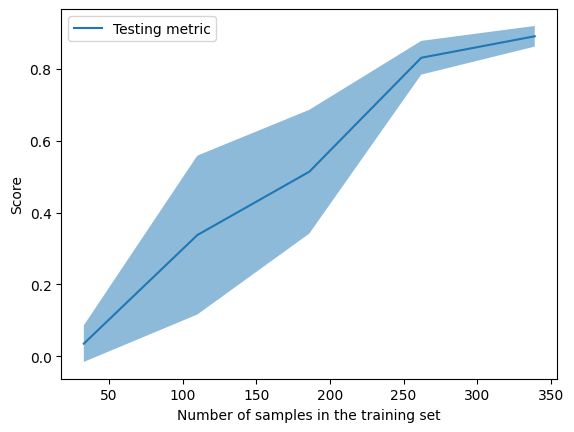

In [77]:
LearningCurveDisplay.from_estimator(rf_e_2, X_train_res, y_train_res, scoring="f1")

### Testing

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [90]:
rf_e_2.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       max_features='log2', n_estimators=300, random_state=123)

In [91]:
y_pred = rf_e_2.predict(X_test)

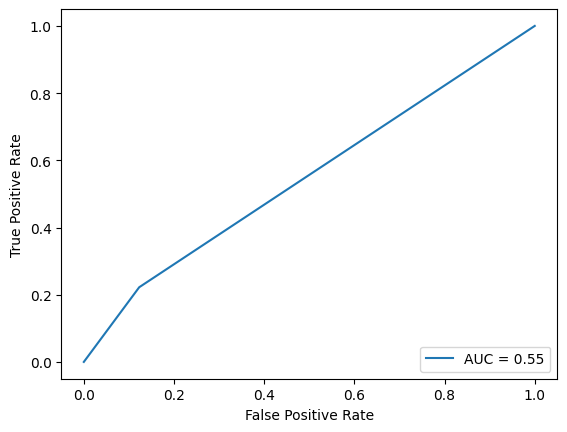

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

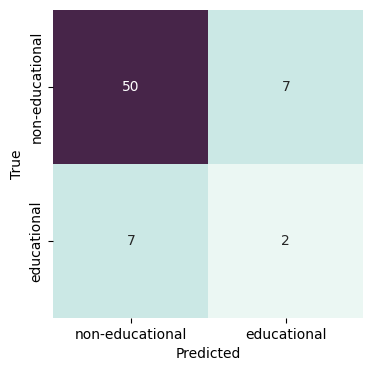

In [93]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap=sns.cubehelix_palette(start=.7, rot=-.5, light=0.95, dark=0.2, as_cmap=True), cbar=False)
ax.set_xlabel('Predicted'); ax.set_ylabel('True');
ax.xaxis.set_ticklabels(['non-educational', 'educational']); ax.yaxis.set_ticklabels(['non-educational', 'educational']);

Testing out the results using a 0.40 threshold (labeled as 1 if pred >= 0.40).

In [177]:
y_pred_40 = (rf_e_2.predict_proba(X_test)[:,1] >= 0.40).astype(bool)

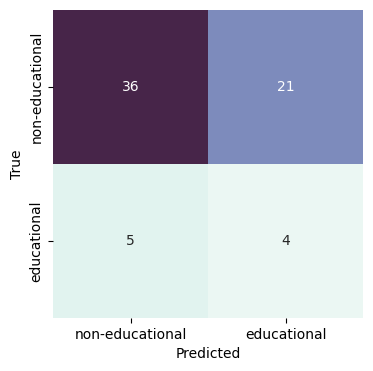

In [178]:
cm = confusion_matrix(y_test, y_pred_40)
plt.figure(figsize=(4,4))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap=sns.cubehelix_palette(start=.7, rot=-.5, light=0.95, dark=0.2, as_cmap=True), cbar=False)
ax.set_xlabel('Predicted'); ax.set_ylabel('True');
ax.xaxis.set_ticklabels(['non-educational', 'educational']); ax.yaxis.set_ticklabels(['non-educational', 'educational']);

In [82]:
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("F1: " + str(f1_score(y_test, y_pred)))

Accuracy: 0.7878787878787878
F1: 0.2222222222222222


Saving the final model as a joblib file and model features for future alignment.

In [51]:
from joblib import dump
dump(rf_e_2, 'models/rf_e_0607.joblib')

['models/rf_e_0607.joblib']

In [176]:
X_test.head(0).to_csv('models/features_educational.csv', index=False)

## Violent

### Preprocessing

In [103]:
play_violent = play_full.dropna(subset=['ratingsStd', 'ratingsSkew', 'releasedYear', 'releasedYears', 'Violent']).drop(columns=['app_fullname', 'title', 'Educational', 'Manipulative_3plus', 'Manipulative_2plus', 'releasedYear'])

In [104]:
play_violent.shape

(300, 24)

In [105]:
X = play_violent.drop(columns=['Violent', 'appId', 'developerCountry'])
y = play_violent['Violent']

In [106]:
y.value_counts()

0.0    205
1.0     95
Name: Violent, dtype: int64

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.fit_transform(X_test[num_columns])

In [144]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [145]:
X_train, X_test = X_train.align(X_test, axis=1, fill_value=0)

In [151]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

### Modeling

In [128]:
lr_v = LogisticRegression(class_weight="balanced")
dt_v = DecisionTreeClassifier(class_weight="balanced")
rf_v = RandomForestClassifier(class_weight="balanced", random_state=123)
xgb_v = XGBClassifier(scale_pos_weight=y.value_counts()[0]/y.value_counts()[1])
svm_v = SVC(class_weight="balanced")

In [129]:
lr_v_score = cross_validate(lr_v, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True, return_estimator=True)
dt_v_score = cross_validate(dt_v, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True, return_estimator=True)
rf_v_score = cross_validate(rf_v, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True, return_estimator=True)
xgb_v_score = cross_validate(xgb_v, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True, return_estimator=True)
svm_v_score = cross_validate(svm_v, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True, return_estimator=True)

In [130]:
print('Model Scores (train_behavior)')
pd.DataFrame({'Model': ['LR', 'DT', 'RF', 'XGB', 'SVM'], 'Accuracy': [lr_v_score['test_accuracy'].mean(), dt_v_score['test_accuracy'].mean(), rf_v_score['test_accuracy'].mean(), xgb_v_score['test_accuracy'].mean(), svm_v_score['test_accuracy'].mean()], 'Recall': [lr_v_score['test_recall'].mean(), dt_v_score['test_recall'].mean(), rf_v_score['test_recall'].mean(), xgb_v_score['test_recall'].mean(), svm_v_score['test_recall'].mean()], 'Precision': [lr_v_score['test_precision'].mean(), dt_v_score['test_precision'].mean(), rf_v_score['test_precision'].mean(), xgb_v_score['test_precision'].mean(), svm_v_score['test_precision'].mean()], 'F1': [lr_v_score['test_f1'].mean(), dt_v_score['test_f1'].mean(), rf_v_score['test_f1'].mean(), xgb_v_score['test_f1'].mean(), svm_v_score['test_f1'].mean(), ]}).sort_values('F1', ascending=False)

Model Scores (train_behavior)


,Model,Accuracy,Recall,Precision,F1
3,XGB,0.824273,0.879065,0.792785,0.833423
2,RF,0.830187,0.830720,0.833737,0.830591
0,LR,0.824126,0.817944,0.829539,0.820925
4,SVM,0.803005,0.836818,0.784640,0.808448
1,DT,0.787651,0.787747,0.792568,0.788977


In [131]:
param_rf_v = { 
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 5, 10]
}

In [132]:
grid_rf_v = GridSearchCV(estimator=rf_v, 
                        param_grid=param_rf_v,
                        cv=skf,
                        scoring='f1', 
                        verbose=1).fit(X_train_res, y_train_res)

Fitting 4 folds for each of 384 candidates, totalling 1536 fits


In [133]:
print(f'rf: {grid_rf_v.best_params_}')

rf: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [134]:
rf_v_2 = RandomForestClassifier(**grid_rf_v.best_params_, class_weight="balanced", random_state=123)

In [135]:
rf_v_score_2 = cross_validate(rf_v_2, X_train_res, y_train_res, cv=skf, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True)

In [136]:
print(f"Accuracy: {rf_v_score_2['test_accuracy'].mean()}")
print(f"Recall: {rf_v_score_2['test_recall'].mean()}")
print(f"Precision: {rf_v_score_2['test_precision'].mean()}")
print(f"F1: {rf_v_score_2['test_f1'].mean()}")

Accuracy: 0.854319717895974
Recall: 0.8607723577235773
Precision: 0.8533362470862471
F1: 0.8562091503267975


In [152]:
rf_v_2.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=150, random_state=123)

In [153]:
y_pred = rf_v_2.predict(X_test)

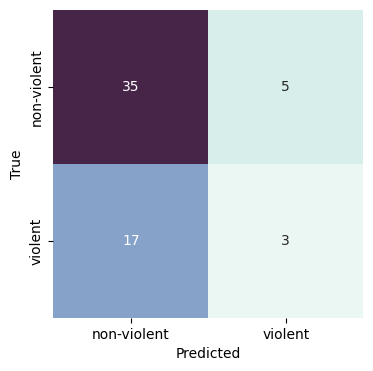

In [154]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap=sns.cubehelix_palette(start=.7, rot=-.5, light=0.95, dark=0.2, as_cmap=True), cbar=False)
ax.set_xlabel('Predicted'); ax.set_ylabel('True');
ax.xaxis.set_ticklabels(['non-violent', 'violent']); ax.yaxis.set_ticklabels(['non-violent', 'violent']);

In [165]:
y_pred_25 = (rf_v_2.predict_proba(X_test)[:,1] >= 0.25).astype(bool)

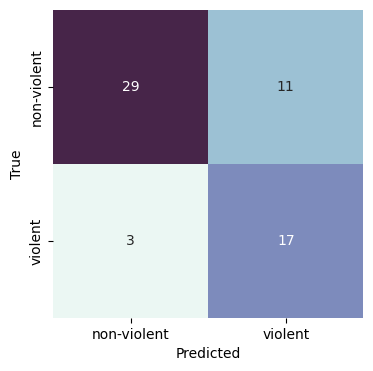

In [166]:
cm = confusion_matrix(y_test, y_pred_25)
plt.figure(figsize=(4,4))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap=sns.cubehelix_palette(start=.7, rot=-.5, light=0.95, dark=0.2, as_cmap=True), cbar=False)
ax.set_xlabel('Predicted'); ax.set_ylabel('True');
ax.xaxis.set_ticklabels(['non-violent', 'violent']); ax.yaxis.set_ticklabels(['non-violent', 'violent']);

In [167]:
from joblib import dump
dump(rf_v_2, 'models/rf_v_0607.joblib')

['models/rf_v_0607.joblib']

In [168]:
X_test.head(0).to_csv('models/features_violent.csv', index=False)